<a href="https://colab.research.google.com/github/mmmhdp/nn_labs/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [1]:
import torch as tr
import pandas as pd
import numpy as np
import scipy as scp
import datetime as dt

from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import pyplot as plt
import seaborn as sns

# eda

In [2]:
train_dt = pd.read_csv('/content/drive/MyDrive/colab_notebooks/train.csv')
test_dt = pd.read_csv('/content/drive/MyDrive/colab_notebooks/test.csv')
train_formula_dt = pd.read_csv('/content/drive/MyDrive/colab_notebooks/formula_train.csv')
test_formula_dt = pd.read_csv('/content/drive/MyDrive/colab_notebooks/formula_test.csv')

In [3]:
(train_dt.isna().sum()!=0).all()

False

In [4]:
train_dt.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,...,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000
mean,4.113874,87.534919,73.000381,71.308789,58.599393,1.165500,1.063972,115.443468,33.228642,44.320187,...,3.151430,3.055206,3.054358,1.295344,1.052631,2.042034,1.482988,0.839731,0.673590,34.502993
std,1.437846,29.786319,33.730910,31.166777,36.902657,0.364607,0.401877,54.614167,27.104426,19.993413,...,1.192035,1.045869,1.175579,0.393231,0.380725,1.244305,0.980906,0.485728,0.454975,34.334793
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.383174,52.078254,58.001648,35.228269,0.966676,0.777721,78.353150,16.790394,32.890369,...,2.117647,2.245649,2.091629,1.060857,0.779166,1.000000,0.920000,0.451754,0.307467,5.330000
50%,4.000000,84.841880,60.547264,66.361592,39.821155,1.199541,1.148646,122.906070,26.585389,45.123500,...,2.605455,2.615321,2.429201,1.368922,1.168512,2.000000,1.062857,0.800000,0.500000,20.000000
75%,5.000000,100.404410,85.982586,78.116681,73.075297,1.444537,1.359836,154.119320,38.193007,58.973428,...,4.019566,3.722419,3.914868,1.589027,1.331531,3.000000,1.912000,1.200000,1.020735,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [5]:
train_formula_dt.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,17010.000000,17010.0,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.0,...,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.0,17010.0,17010.0,17010.000000
mean,0.018447,0.0,0.011884,0.035189,0.141945,0.376868,0.012462,3.010023,0.015318,0.0,...,0.035000,0.023379,0.036708,0.049646,0.042367,0.200175,0.0,0.0,0.0,34.502993
std,0.287419,0.0,0.125699,0.861767,1.107689,4.357716,0.123290,3.796711,0.136147,0.0,...,0.310635,0.800146,0.205809,0.279357,0.286488,0.656456,0.0,0.0,0.0,34.334793
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000210
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.330000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,63.000000
max,14.000000,0.0,2.600000,40.000000,105.000000,120.000000,5.000000,66.000000,4.000000,0.0,...,5.000000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0,185.000000


In [6]:
train_formula_dt['material']

0               Ba0.2La1.8Cu1O4
1        Ba0.1La1.9Ag0.1Cu0.9O4
2               Ba0.1La1.9Cu1O4
3             Ba0.15La1.85Cu1O4
4               Ba0.3La1.7Cu1O4
                  ...          
17005        Tm0.84Lu0.16Fe3Si5
17006           Tl1Ba2Ca3Cu4O11
17007                Nb0.8Pd0.2
17008              Nb0.69Pd0.31
17009             Fe1Se0.2Te0.8
Name: material, Length: 17010, dtype: object

<Axes: >

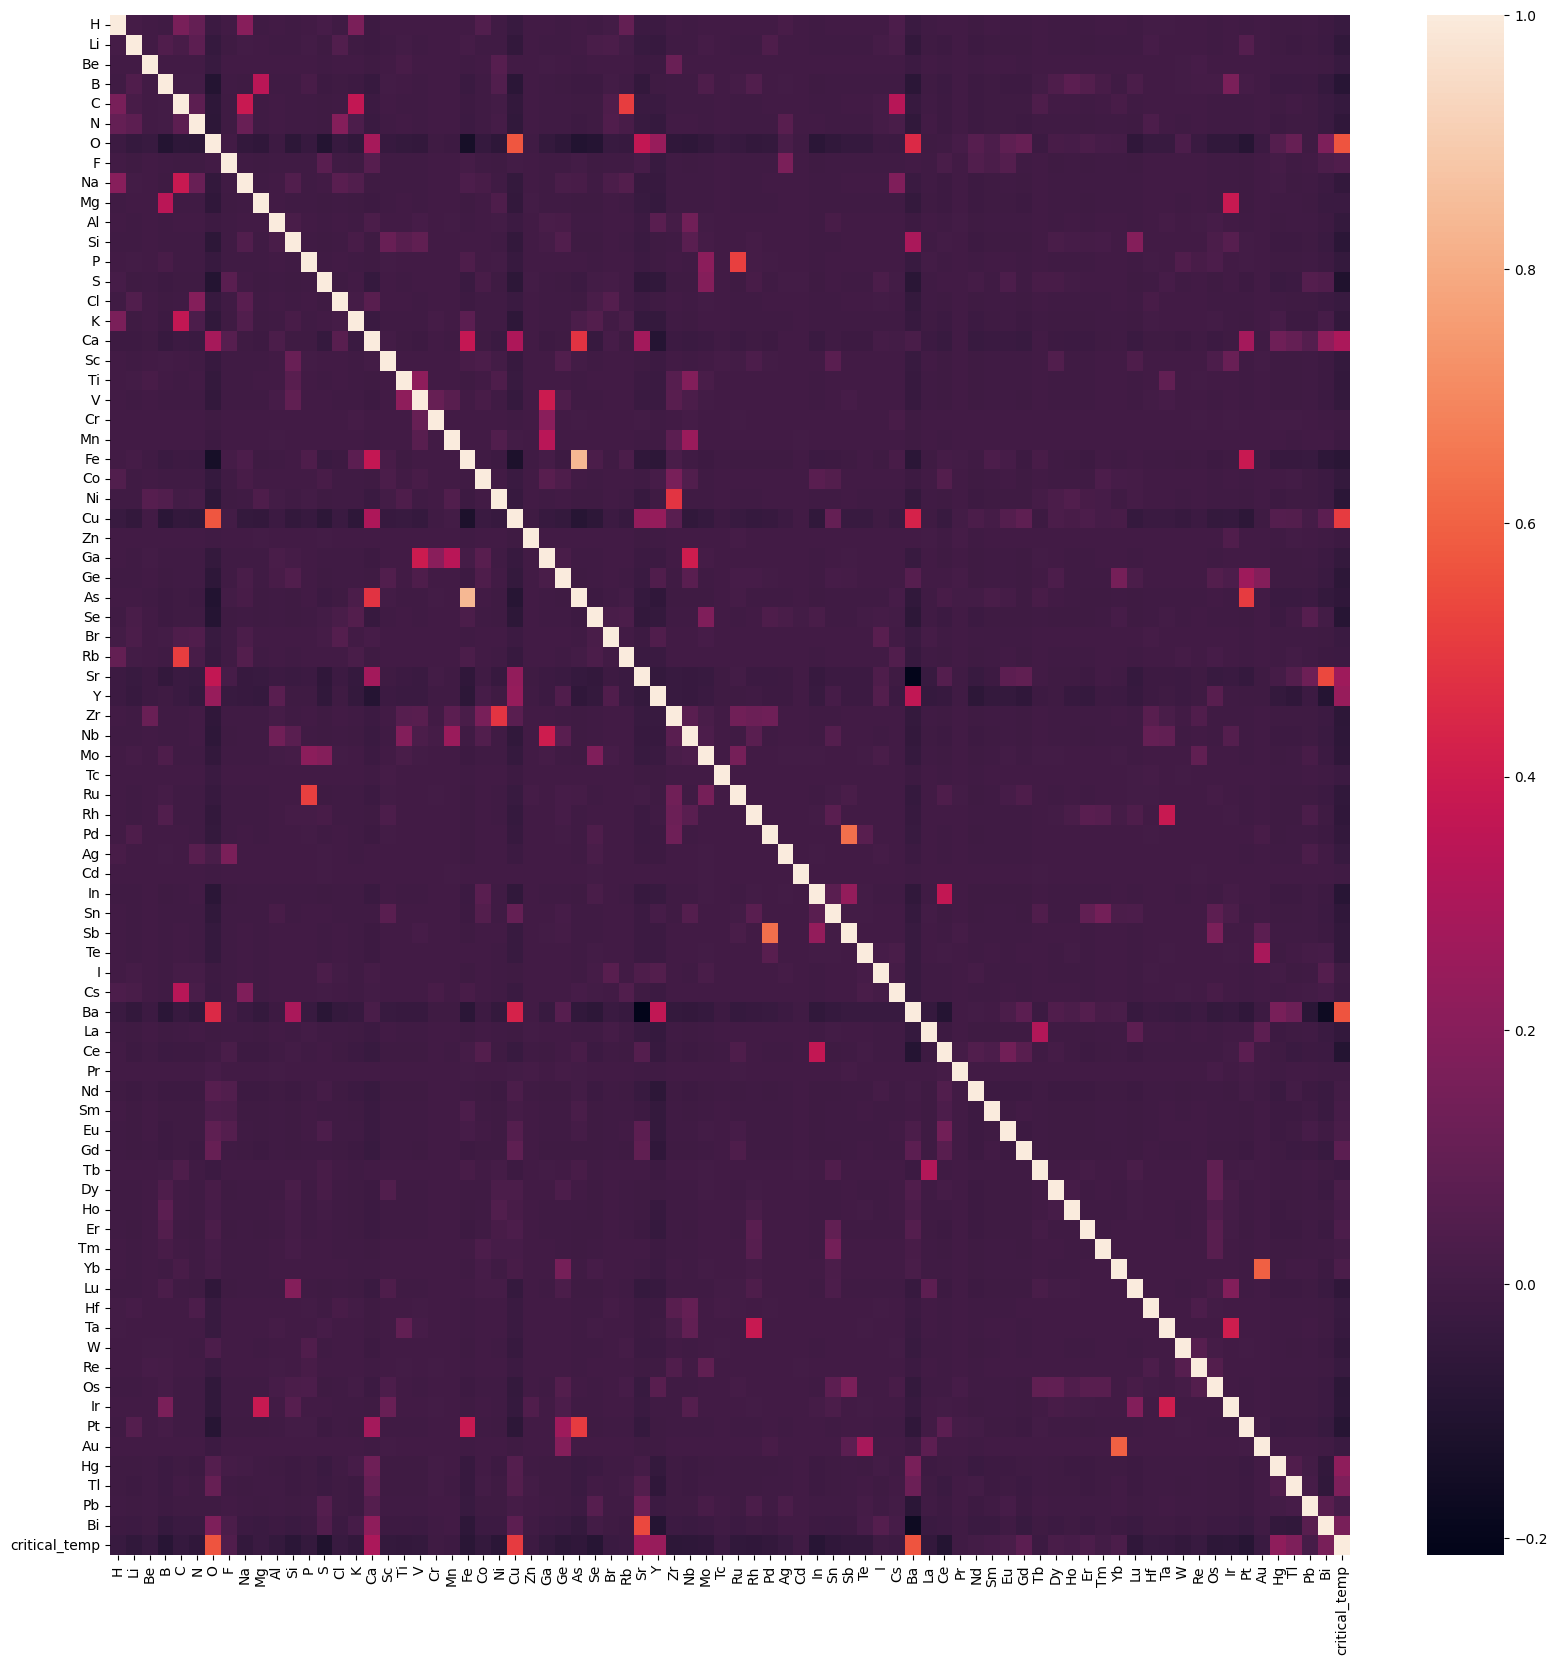

In [7]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(train_formula_dt.drop(["He","Ne","Ar","Kr","Xe","Pm","Po","At","Rn","material"],axis=1).corr())

<Axes: >

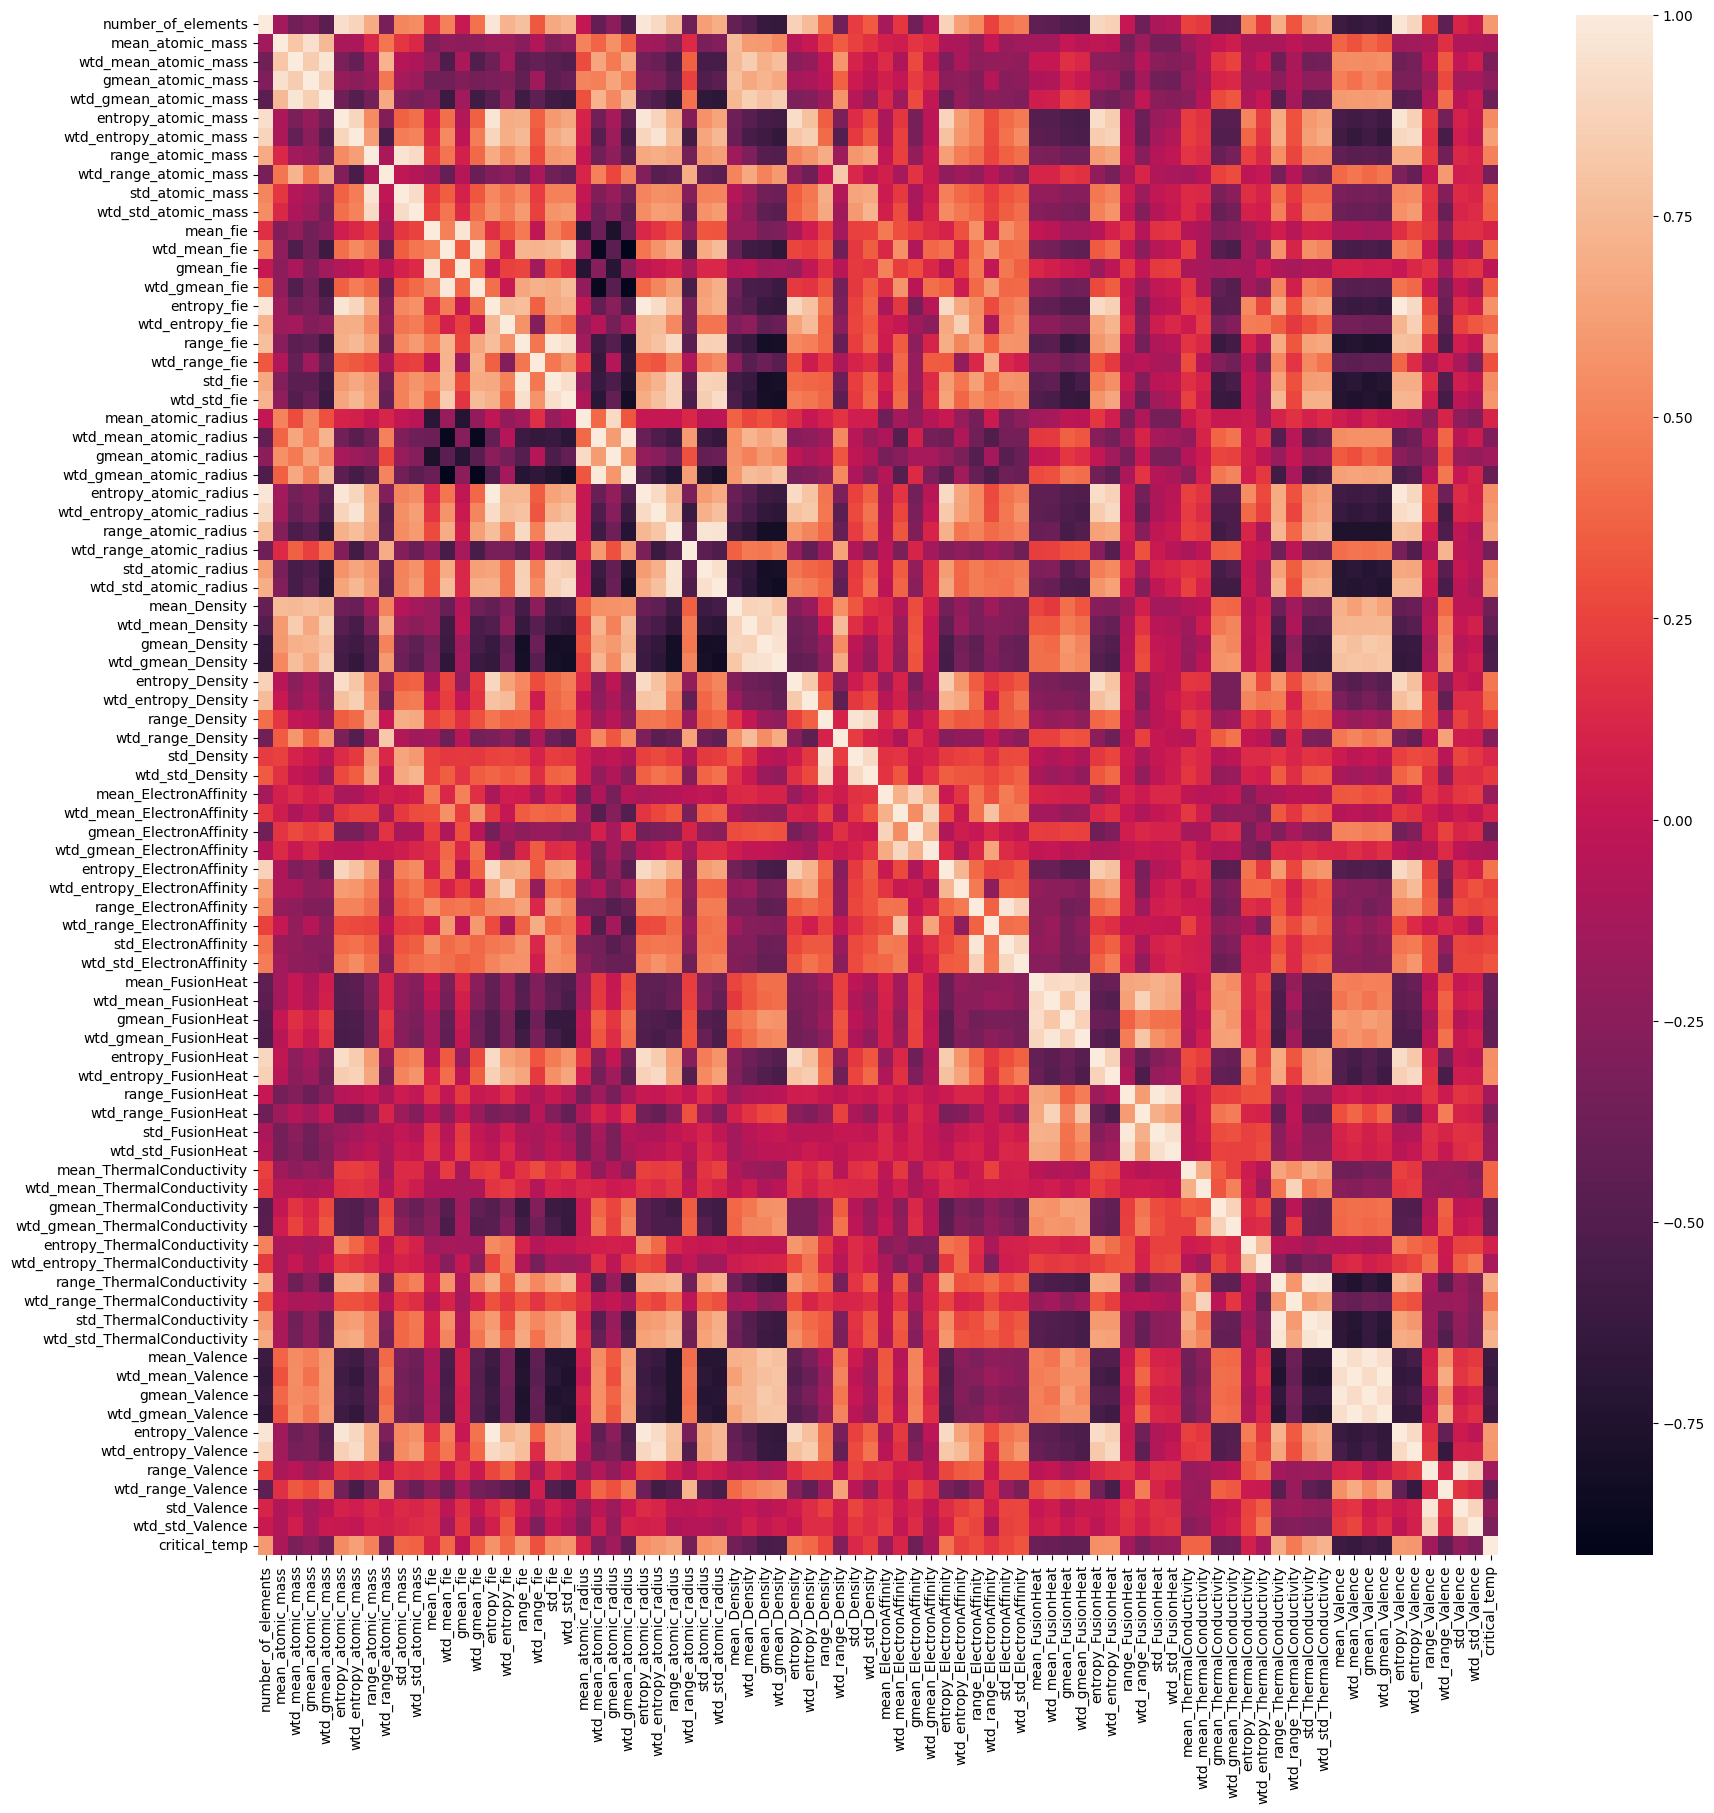

In [8]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(train_dt.corr())

<Axes: >

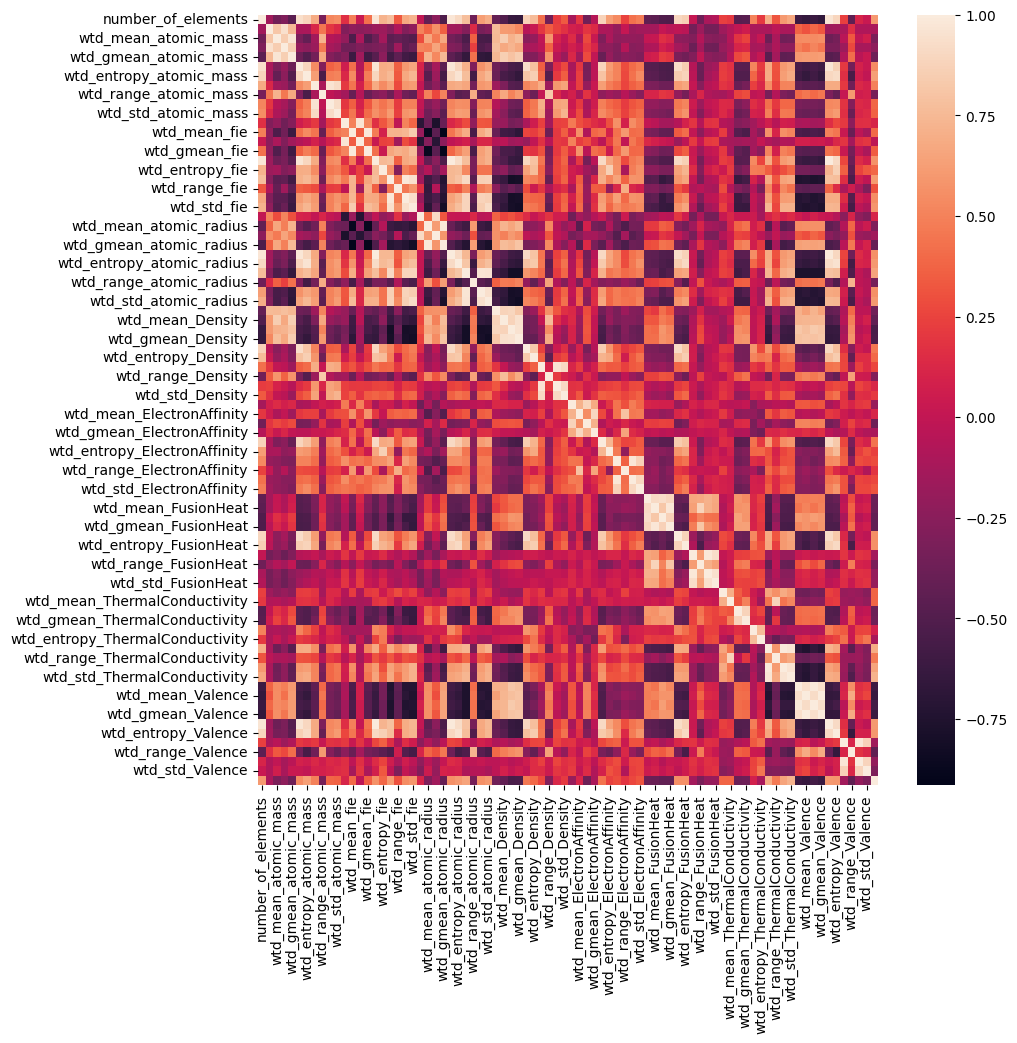

In [9]:
q_features = [
    # "number_of_elements",
    # "atomic_mass",
    # "fie",
    # "atomic_radius",
    # "Density",
    # "ElectronAffinity",
    # "FusionHeat",
    # "ThermalConductivity",
    # "Valence",
    ]

prefixes = [
    # "mean_",
    "wtd_mean_",
    "gmean_",
    # "wtd_gmean_",
    "entropy_",
    # "wtd_entropy_",
    "range_",
    # "wtd_range_",
    "std_",
    # "wtd_std_"
    ]

to_drop = []
for feat in q_features:
    for prefix in prefixes:
        to_drop.append(prefix+feat)

fig = plt.figure(figsize=(10,10))
sns.heatmap(train_dt.drop(columns=to_drop).corr())

In [10]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               17010 non-null  int64  
 1   mean_atomic_mass                 17010 non-null  float64
 2   wtd_mean_atomic_mass             17010 non-null  float64
 3   gmean_atomic_mass                17010 non-null  float64
 4   wtd_gmean_atomic_mass            17010 non-null  float64
 5   entropy_atomic_mass              17010 non-null  float64
 6   wtd_entropy_atomic_mass          17010 non-null  float64
 7   range_atomic_mass                17010 non-null  float64
 8   wtd_range_atomic_mass            17010 non-null  float64
 9   std_atomic_mass                  17010 non-null  float64
 10  wtd_std_atomic_mass              17010 non-null  float64
 11  mean_fie                         17010 non-null  float64
 12  wtd_mean_fie      

In [11]:
train_dt.merge(train_formula_dt, on="critical_temp")['critical_temp']
# train_dt['critical_temp']

0          29.000
1          29.000
2          29.000
3          29.000
4          29.000
           ...   
463781      3.275
463782      0.785
463783      1.585
463784      9.670
463785    122.100
Name: critical_temp, Length: 463786, dtype: float64

# model stuff

In [2]:
import torch as tr
import pandas as pd
import numpy as np
import scipy as scp
import datetime as dt

from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
class ChemDataTransform():
    def __init__(self):
        self.MNscaler = preprocessing.MinMaxScaler()

    def fit_transform(self, data:pd.DataFrame):

        data = self.__transform(data)
        # data = pd.DataFrame(self.MNscaler.fit_transform(data), columns = data.columns)

        return data

    def transform(self, data:pd.DataFrame):
        return self.__transform(data)

    def __transform(self, data:pd.DataFrame):
        q_features_from_formula = ["He","Ne","Ar","Kr","Xe","Pm","Po","At","Rn","material"]

        q_features = [
            # "number_of_elements",
            # "atomic_mass",
            # "fie",
            # "atomic_radius",
            # "Density",
            # "ElectronAffinity",
            # "FusionHeat",
            # "ThermalConductivity",
            # "Valence"
            ]

        prefixes = [
            # "mean_",
            # "wtd_mean_",
            # "gmean_",
            # "wtd_gmean_",
            # "entropy_",
            # "wtd_entropy_",
            # "range_",
            # "wtd_range_",
            # "std_",
            # "wtd_std_"
            ]

        to_drop = []
        for feat in q_features:
            for prefix in prefixes:
                to_drop.append(prefix+feat)

        to_drop += q_features_from_formula
        data = data.drop(to_drop,axis=1)


        data["range_Valence"].astype(float)
        data["range_atomic_radius"].astype(float)
        data["number_of_elements"].astype(float)

        return data


In [4]:
class ChemTrainDataCont(Dataset):
    def __init__(self, X, y):
        self.X = tr.FloatTensor(X.to_numpy())
        self.y = tr.FloatTensor(y.to_numpy())


    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, ind):
        return (self.X[ind], self.y[ind])


class ChemValidationDataCont(Dataset):

    def __init__(self, X):
        self.X = tr.FloatTensor(X.to_numpy())

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, ind):
        return self.X[ind]

In [5]:
class DataPreprocessor():
    def __init__(self,
                 train_data_path, validation_data_path,
                 train_formula_data_path, validation_formula_data_path,
                 target_column_name,
                 transformer = ChemDataTransform,
                 train_data_cont = ChemTrainDataCont,
                 validation_data_cont = ChemValidationDataCont):
        self.transformer = transformer()
        self.target_column_name = target_column_name
        self.train_data_path = train_data_path
        self.validation_data_path = validation_data_path

        self.train_formula_data_path = train_formula_data_path
        self.validation_formula_data_path = validation_formula_data_path

        self.train_data_cont = train_data_cont
        self.validation_data_cont = validation_data_cont

        self.train_data = self.__preprocess_train_data()
        self.validation_data = self.__preprocess_validation_data()

        self.__splitted_train_data = self.__get_splitted_train_data()

    def get_preprocess_data(self, is_test=False):
        return self.validation_data if is_test else self.train_data

    def __get_splitted_train_data(self):
        features = self.train_data.drop(columns=[self.target_column_name])
        target = self.train_data[self.target_column_name]
        tra_fts, tes_fts, tra_targ, tes_targ =  train_test_split(features, target,
                                train_size=0.75,
                                shuffle=True,
                                random_state=42)
        return tra_fts, tes_fts, tra_targ, tes_targ

    def get_train_data_cont(self):
        train_features, _ , train_target, _ = self.__splitted_train_data
        train_cont = self.train_data_cont(train_features, train_target)
        return train_cont

    def get_test_data_cont(self):
        _ , test_features , _ , test_target = self.__splitted_train_data
        train_cont = self.train_data_cont(test_features, test_target)
        return train_cont

    def get_validation_data_cont(self):
        return self.validation_data_cont(self.validation_data)

    def __preprocess_train_data(self):
        raw_train_data = pd.read_csv(self.train_data_path)
        raw_formula_train_data = pd.read_csv(self.train_formula_data_path)

        raw_train_data = raw_train_data.merge(raw_formula_train_data, on=self.target_column_name)

        train_data = self.transformer.fit_transform(raw_train_data)
        return train_data

    def __preprocess_validation_data(self):
        raw_validation_data = pd.read_csv(self.validation_data_path)
        raw_formula_validation_data = pd.read_csv(self.validation_formula_data_path)

        raw_validation_data = raw_validation_data.merge(raw_formula_validation_data, left_index=True, right_index=True)
        test_data = self.transformer.transform(raw_validation_data)
        return test_data

In [6]:
class ChemRegNn(nn.Module):
    def __init__(self, num_of_entry_neurs, num_of_inner_layers_neurs):
        super().__init__()
        self.entry = tr.nn.Linear(num_of_entry_neurs, num_of_inner_layers_neurs)
        # self.act_1 = tr.nn.functional.sigmoid
        self.act_2 = tr.nn.functional.relu
        # self.act = tr.nn.functional.tanh

        self.drop =m = nn.Dropout(p=0.5)

        self.inner_1 = tr.nn.Linear(num_of_inner_layers_neurs, num_of_inner_layers_neurs//2)

        self.inner_2 = tr.nn.Linear(num_of_inner_layers_neurs//2, num_of_inner_layers_neurs//4)

        self.inner_3 = tr.nn.Linear(num_of_inner_layers_neurs//4, num_of_inner_layers_neurs//8)

        self.output = tr.nn.Linear(num_of_inner_layers_neurs//8, 1)

    def forward(self, features):
        features = self.entry(features)
        features = self.act_2(features)
        features = self.drop(features)

        features = self.inner_1(features)
        features = self.act_2(features)
        features = self.drop(features)


        features = self.inner_2(features)
        features = self.act_2(features)
        features = self.drop(features)


        features = self.inner_3(features)
        features = self.act_2(features)
        features = self.drop(features)


        features = self.output(features)
        return features

In [7]:
class ChemNnRegressor():
    def __init__(self,
                 dataset, network, loss_f,
                 device,
                 optimizer,
                 scheduler,
                 permutate,
                #  learning_rate,
                 epoch_amount,
                 batch_size,
                 max_batches_per_epoch,
                 early_stopping
                 ):
        self.dataset = dataset[0]
        self.test_dataset = dataset[1]

        self.init_model = network
        self.best_model = network

        self.loss_f = loss_f
        self.device = device
        self.optimizer = optimizer
        self.scheduler = scheduler

        self.permutate = permutate
        # self.learning_rate = learning_rate
        self.epoch_amount = epoch_amount

        self.batch_size = batch_size
        self.max_batches_per_epoch = max_batches_per_epoch
        self.early_stopping = early_stopping


    def predict(self, features):
        return self.best_model(features)


    def fit(self, train_dataset):

        network = self.init_model
        device = tr.device(self.device)

        network = network.to(device)

        opt = self.optimizer
        sch = self.scheduler

        loaded_data = DataLoader(train_dataset, batch_size = self.batch_size, shuffle = self.permutate)

        best_val_loss = float("inf")
        best_epoch = 0


        for epoch in range(self.epoch_amount):

            network.train()

            mean_loss, batch_time = self.__epoch(network, loaded_data, opt, sch, device)

            best_val_loss = min(mean_loss, best_val_loss)
            best_epoch = epoch if mean_loss == best_val_loss else best_epoch
            self.best_model = network if best_epoch == epoch else self.best_model

            print(f"epoch : {epoch} mean_loss: {mean_loss} batch_time: {batch_time}")

            network.eval()

            curr_mse = self.__reality_check(device)

            print(f"MSE on test: {curr_mse}")


    def __reality_check(self, device):
        test_features = self.test_dataset.X.to(device)
        test_real_target = self.test_dataset.y

        test_pred_target = self.predict(test_features)

        pred_target = np.array(test_pred_target.detach().cpu().flatten())
        real_target = np.array(test_real_target.flatten())

        return mean_squared_error(real_target, pred_target)



    def __epoch(self, network, loaded_data, opt, sch, device):
        start_time_stamp = dt.datetime.now()

        n_batches = 0
        mean_loss_per_batch = 0

        for features_batch, target_batch in loaded_data:

            opt.zero_grad()

            features_batch = features_batch.to(device)
            target_batch = target_batch.to(device)

            pred_target = network(features_batch)
            loss = self.loss_f(pred_target, target_batch.reshape(pred_target.shape))
            loss.backward()
            opt.step()

            mean_loss_per_batch+=loss
            n_batches+=1

            sch.step()

        mean_loss_per_batch = float(mean_loss_per_batch)
        mean_loss = mean_loss_per_batch/n_batches

        finish_time_stamp = dt.datetime.now()
        batch_time = finish_time_stamp - start_time_stamp

        return mean_loss, batch_time

def staff():
    dpr_params = {
        "train_data_path" : "/content/drive/MyDrive/colab_notebooks/train.csv",
        "validation_data_path" : "/content/drive/MyDrive/colab_notebooks/test.csv",

        "train_formula_data_path" : "/content/drive/MyDrive/colab_notebooks/formula_train.csv",
        "validation_formula_data_path" : "/content/drive/MyDrive/colab_notebooks/formula_test.csv",

        "target_column_name" : "critical_temp",
        "transformer" : ChemDataTransform,
        "train_data_cont" : ChemTrainDataCont,
        "validation_data_cont" : ChemValidationDataCont
        }
    dpr = DataPreprocessor(**dpr_params)

    network_params = {
        "num_of_entry_neurs" : 158,
        "num_of_inner_layers_neurs" : 512
    }
    network = ChemRegNn(**network_params)

    optimizer = tr.optim.RMSprop(network.parameters(), lr=1e-5)
    scheduler = tr.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

    regr_params = {
       "dataset": [dpr.get_train_data_cont(), dpr.get_test_data_cont()],
       "network": network,
       "loss_f": nn.MSELoss(),
       "device" : 'cpu',
    #    "learning_rate": 1e-5,
       "optimizer" : optimizer,
       "scheduler" : scheduler,
       "permutate" : True,
       "epoch_amount" : 500,
       "batch_size" : 1024,
       "max_batches_per_epoch" : None,
       "early_stopping" : 20
    }
    regr = ChemNnRegressor(**regr_params)
    return dpr, network, regr

dpr, network, regr = staff()
dpr, network, regr

train_data = dpr.get_train_data_cont()
train_data.X, train_data.y

regr.fit(train_data)

epoch : 0 mean_loss: 3212.427573529412 batch_time: 0:00:21.379236
MSE on test: 1992.493408203125
epoch : 1 mean_loss: 1968.8332720588235 batch_time: 0:00:18.700686
MSE on test: 1793.8814697265625
epoch : 2 mean_loss: 1575.417463235294 batch_time: 0:00:19.117890
MSE on test: 1660.4193115234375
epoch : 3 mean_loss: 1395.003125 batch_time: 0:00:17.802029
MSE on test: 1605.4681396484375
epoch : 4 mean_loss: 1287.43125 batch_time: 0:00:20.872574
MSE on test: 1578.6552734375
epoch : 5 mean_loss: 1203.7041360294118 batch_time: 0:00:17.926024
MSE on test: 1537.3851318359375
epoch : 6 mean_loss: 1153.155330882353 batch_time: 0:00:19.185740
MSE on test: 1542.629150390625
epoch : 7 mean_loss: 1105.6845588235294 batch_time: 0:00:19.301830
MSE on test: 1530.5638427734375
epoch : 8 mean_loss: 1072.5679227941177 batch_time: 0:00:18.977981
MSE on test: 1531.536865234375
epoch : 9 mean_loss: 1038.9322610294118 batch_time: 0:00:18.595792
MSE on test: 1520.3172607421875
epoch : 10 mean_loss: 1016.0497242

KeyboardInterrupt: 

In [8]:
test_data = dpr.get_test_data_cont()
test_data.X

tensor([[  3.0000,  50.2682,  47.9801,  ...,   0.0000,   0.0000,   0.0000],
        [  4.0000,  71.4179,  73.5770,  ...,   0.0000,   0.0000,   0.0000],
        [  2.0000,  75.0786,  80.4604,  ...,   0.0000,   0.0000,   0.0000],
        ...,
        [  6.0000,  92.8552,  98.4327,  ...,   0.0000,   0.0000,   0.0000],
        [  4.0000,  51.6351,  44.1894,  ...,   0.0000,   0.0000,   0.0000],
        [  7.0000, 110.5405,  89.0488,  ...,   0.0000,   0.0000,   0.0000]])

In [10]:
test_pred_target = regr.predict(test_data.X.to(tr.device('cpu')))
test_real_target = test_data.y.cpu()

pred_target = np.array(test_pred_target.detach().cpu())
real_target = np.array(test_real_target.cpu())

mean_squared_error(real_target, pred_target), real_target.mean(), pred_target.mean()

(422.57645, 38.216366, 36.20107)

In [12]:
validation_data = dpr.get_validation_data_cont()

pred_target = regr.predict(validation_data.X.to(tr.device('cpu')))

pred_target = np.array(pred_target.detach().cpu())

pred_target

array([[30.282866 ],
       [31.533487 ],
       [75.51709  ],
       ...,
       [16.205091 ],
       [ 7.7686114],
       [ 6.0520506]], dtype=float32)

In [13]:
pred_dt = pd.DataFrame(pred_target)
pred_dt

,0
0,30.282866
1,31.533487
2,75.517090
3,66.209236
4,26.929213
...,...
4248,9.153199
4249,6.327034
4250,16.205091
4251,7.768611


In [14]:
pred_dt.to_csv(path_or_buf = "output.csv",
               index_label="index",
               header = ["critical_temp"])